#Outliers Dstection

Outliers are the one-off values which always stand out from our data. They may be very large or very small with respect to the entire dataxet. Theyare observations which are not normal and differ from the normal data. 

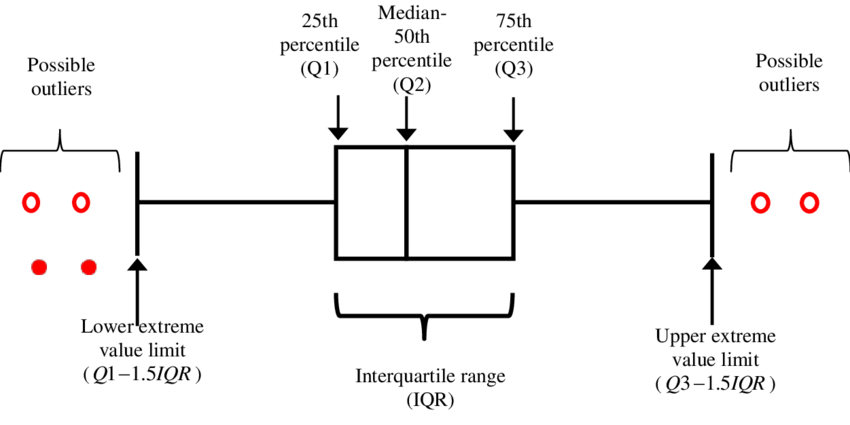

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

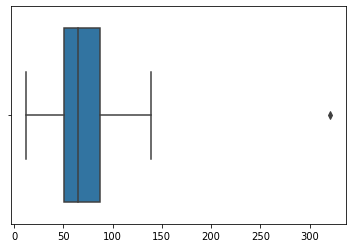

In [2]:
import numpy as np
%matplotlib inline
import seaborn as sns

data = [12,32,45,51,54,59,65,74,77,87,121,139,321]

sns.boxplot(data)

<AxesSubplot:ylabel='Count'>

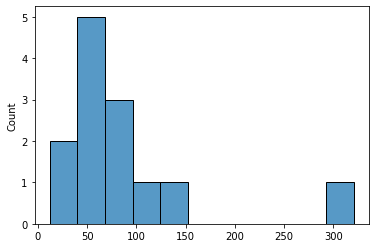

In [4]:
sns.histplot(data)

In [5]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

In [7]:
url='https://raw.githubusercontent.com/SaravananJaichandar/Credit-Risk-Model/master/german_credit_data.csv'



In [9]:
data = pd.read_csv(url)
data.head(5)


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


Plotting a boxplot on the 'Age' column¶

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

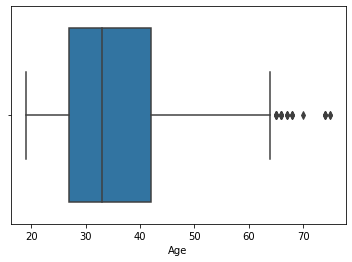

In [10]:
sns.boxplot(data['Age'])


some data points are outliers for 'Age' column.

## Calculate the 1st Quartile and the 3rd Quartile of the 'Age' column


In [11]:

Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)

In [13]:
print("The 1st and 2nd quartile values are", Q1,Q3)

The 1st and 2nd quartile values are 27.0 42.0


##Calculating the Inter-quartile range¶

In [14]:
IQR = Q3 - Q1
print (IQR)

15.0


##Finding the Lower Fence and the Upper Fence

In [15]:
Lower_fence = Q1 - (1.5 * IQR)
Upper_fence = Q3 + (1.5 * IQR)
print(Lower_fence,Upper_fence )

4.5 64.5


##Check the 'Age' data less than the Lower Fence or greater than the Upper Fence. They are outliers.



In [16]:
outliers=data[(data['Age']<Lower_fence)|(data['Age']>Upper_fence)]
outliers

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
75,75,66,male,3,free,little,little,1526,12,car
137,137,66,male,1,own,quite rich,moderate,766,12,radio/TV
163,163,70,male,3,free,little,moderate,7308,10,car
179,179,65,male,2,own,little,little,571,21,car
186,186,74,female,3,free,little,moderate,5129,9,car
187,187,68,male,0,free,little,moderate,1175,16,car
213,213,66,male,3,own,little,rich,1908,30,business
330,330,75,male,3,free,little,little,6615,24,car
430,430,74,male,1,own,little,NaN,3448,5,business


#data  within the Lower and Upper Fence¶

In [20]:
data[((data['Age']> Lower_fence) & (data['Age']< Upper_fence))]

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


using ~

##Removing Outliers

In [22]:
data[~((data['Age']<Lower_fence)|(data['Age']>Upper_fence))]


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [28]:
no=data.loc[(data['Age']> Lower_fence) &  (data['Age'] < Upper_fence)]
no
no['Age'].unique(

array([22, 49, 45, 53, 35, 61, 28, 25, 24, 60, 32, 44, 31, 48, 26, 36, 39,
       42, 34, 63, 27, 30, 57, 33, 37, 58, 23, 29, 52, 50, 46, 51, 41, 40,
       47, 56, 54, 20, 21, 38, 43, 55, 64, 19, 62, 59])

In [30]:
no['Age'].value_counts()

27    51
26    50
23    48
24    44
28    43
25    41
35    40
30    40
36    39
31    38
29    37
32    34
33    33
34    32
37    29
22    27
40    25
38    24
42    22
39    21
46    18
41    17
47    17
43    17
44    17
45    15
49    14
20    14
21    14
50    12
48    12
54    10
57     9
52     9
55     8
51     8
63     8
53     7
61     7
60     6
58     5
64     5
56     3
59     3
19     2
62     2
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

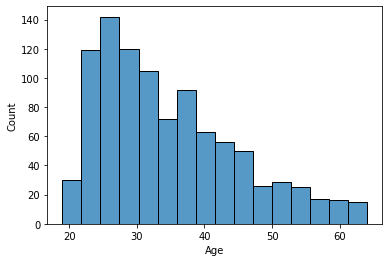

In [32]:
sns.histplot(no['Age'])